# **Environment Setup**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('reviews.csv')

In [ ]:
df.shape

(29126, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29126 entries, 0 to 29125
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   29124 non-null  object
 1   Name                    29126 non-null  object
 2   Review Date             29126 non-null  object
 3   Airline                 29126 non-null  object
 4   Verified                29126 non-null  object
 5   Reviews                 29126 non-null  object
 6   Type of Traveller       29126 non-null  object
 7   Month Flown             29126 non-null  object
 8   Route                   29126 non-null  object
 9   Class                   29126 non-null  object
 10  Seat Comfort            29126 non-null  int64 
 11  Staff Service           29126 non-null  int64 
 12  Food & Beverages        29126 non-null  int64 
 13  Inflight Entertainment  29126 non-null  int64 
 14  Value For Money         29126 non-null  int64 
 15  Ov

In [ ]:
'''

Title: Title of the review
Name: User name
Review Date: Date the user left the review
Airline: Airline
Verified: Is the airline verified or not (TRUE/FALSE)
Reviews: Review Content
Type of Traveller: Is the user travelling alone, with family/partner, for leisure or business?
Month Flown: Month and Year
Route: From/to Destination with connecting city, if applicable
Class: Class (Economy, Business, etc.)
Seat Comfort: Review from 1-5 on seat comfort
Staff Service: Review from 1-5 on staff service
Food & Beverages: Review from 1-5 on food and beverages
Inflight Entertainment: Review from 1-5 for inflight entertainment
Value for Money: Review from 1-5 on value for money
Overall Rating: Review from 1-10 on overall
Recommended:

'''

# **Data Cleaning**

**Exploratory Questions:**

- Are there any columns we would like to drop for privacy reasons or because useless for our study? Yes, the "**Name**" column.
- Are there any columns we would like to rename for clarity? Yes.

"**Title**" to "**Review Title**"

"**Reviews**" to "**Review Content**"
- Are there any missings? No.
- Are there any duplicates? No.
- Are there leading / trailing spaces in the object type columns? Yes -> Removed.
- Do we need to change the format for any of the columns? Yes -> Converting "**Verified**" and "**Recommended**" to boolean.

Unverified review: 0 | Verified review: 1

Unrecommend airline: 0 | Recommended airline: 1




In [ ]:
df.drop(['Name'], axis=1, inplace=True)
df.rename(columns={'Title': 'Review Title'}, inplace=True)
df.rename(columns={'Reviews': 'Review Content'}, inplace=True)
#df['Review Date'] = pd.to_datetime(df['Review Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29126 entries, 0 to 29125
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Review Title            29124 non-null  object
 1   Review Date             29126 non-null  object
 2   Airline                 29126 non-null  object
 3   Verified                29126 non-null  object
 4   Review Content          29126 non-null  object
 5   Type of Traveller       29126 non-null  object
 6   Month Flown             29126 non-null  object
 7   Route                   29126 non-null  object
 8   Class                   29126 non-null  object
 9   Seat Comfort            29126 non-null  int64 
 10  Staff Service           29126 non-null  int64 
 11  Food & Beverages        29126 non-null  int64 
 12  Inflight Entertainment  29126 non-null  int64 
 13  Value For Money         29126 non-null  int64 
 14  Overall Rating          29126 non-null  int64 
dtypes:

In [ ]:
df.head(5)

,Review Title,Review Date,Airline,Verified,Review Content,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
0,Food was below par,21st April 2024,Singapore Airlines,True,Overall disappointing from Singapore Airline...,Couple Leisure,April 2024,Melbourne to Singapore,Economy Class,4,5,4,4,3,5
1,recent pricing and service changes,21st April 2024,Singapore Airlines,True,I usually fly Singapore Airlines internation...,Business,April 2024,Zurich to Singapore,Premium Economy,2,4,1,1,1,6
2,Crew was super nice,14th April 2024,Singapore Airlines,True,"Flight was great! Crew was super nice, Chief...",Solo Leisure,January 2024,London to Singapore,Business Class,5,5,3,2,5,10
3,attendants are helpful and polite,13th April 2024,Singapore Airlines,True,The cabin is clean. Flight attendants are he...,Solo Leisure,April 2024,Taipei to Singapore,Economy Class,5,4,5,5,4,9
4,food were served last,12th April 2024,Singapore Airlines,False,From Kochi to Singapore and vice verse we t...,Couple Leisure,April 2024,Kochi to Singapore,Economy Class,3,2,5,3,2,3


In [23]:
# Remove ordinal suffixes from 'Review Date'
df['Review Date'] = df['Review Date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)

# Convert 'Review Date' to datetime, pandas infers the format
df['Review Date'] = pd.to_datetime(df['Review Date'])

# Check if the 'Month Flown' column contains full month name and year (e.g., 'April 2024')
df['Month Flown'] = pd.to_datetime(df['Month Flown'], errors='coerce')

# Check the first few rows to confirm changes
df.head()

<ipython-input-23-adb48880f621>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month Flown'] = pd.to_datetime(df['Month Flown'], errors='coerce')  # 'coerce' will set invalid parsing as NaT


,Review Title,Review Date,Airline,Verified,Review Content,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
0,Food was below par,2024-04-21,Singapore Airlines,True,Overall disappointing from Singapore Airline...,Couple Leisure,2024-04-01,Melbourne to Singapore,Economy Class,4,5,4,4,3,5
1,recent pricing and service changes,2024-04-21,Singapore Airlines,True,I usually fly Singapore Airlines internation...,Business,2024-04-01,Zurich to Singapore,Premium Economy,2,4,1,1,1,6
2,Crew was super nice,2024-04-14,Singapore Airlines,True,"Flight was great! Crew was super nice, Chief...",Solo Leisure,2024-01-01,London to Singapore,Business Class,5,5,3,2,5,10
3,attendants are helpful and polite,2024-04-13,Singapore Airlines,True,The cabin is clean. Flight attendants are he...,Solo Leisure,2024-04-01,Taipei to Singapore,Economy Class,5,4,5,5,4,9
4,food were served last,2024-04-12,Singapore Airlines,False,From Kochi to Singapore and vice verse we t...,Couple Leisure,2024-04-01,Kochi to Singapore,Economy Class,3,2,5,3,2,3


In [24]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

Review Title              2
Review Date               0
Airline                   0
Verified                  0
Review Content            0
Type of Traveller         0
Month Flown               3
Route                     0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
dtype: int64


In [25]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 176


In [41]:
# Drop duplicate rows
df = df.drop_duplicates()

# Verify by checking for duplicates again
duplicates_after_drop = df.duplicated().sum()
print("Number of duplicate rows after dropping:", duplicates_after_drop)

Number of duplicate rows after dropping: 0


In [26]:
# Check for leading/trailing spaces in object columns
for column in df.select_dtypes(include='object').columns:
    leading_spaces = df[column].str.startswith(' ').sum()
    trailing_spaces = df[column].str.endswith(' ').sum()
    print(f"{column}: Leading spaces {leading_spaces}, Trailing spaces {trailing_spaces}")

Review Title: Leading spaces 90, Trailing spaces 543
Airline: Leading spaces 0, Trailing spaces 0
Verified: Leading spaces 1, Trailing spaces 0
Review Content: Leading spaces 28887, Trailing spaces 3173
Type of Traveller: Leading spaces 0, Trailing spaces 0
Route: Leading spaces 0, Trailing spaces 0
Class: Leading spaces 0, Trailing spaces 0


In [27]:
# Remove leading/trailing spaces in object columns
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].str.strip()

In [28]:
# Check for leading/trailing spaces in object columns
for column in df.select_dtypes(include='object').columns:
    leading_spaces = df[column].str.startswith(' ').sum()
    trailing_spaces = df[column].str.endswith(' ').sum()
    print(f"{column}: Leading spaces {leading_spaces}, Trailing spaces {trailing_spaces}")

Review Title: Leading spaces 0, Trailing spaces 0
Airline: Leading spaces 0, Trailing spaces 0
Verified: Leading spaces 0, Trailing spaces 0
Review Content: Leading spaces 0, Trailing spaces 0
Type of Traveller: Leading spaces 0, Trailing spaces 0
Route: Leading spaces 0, Trailing spaces 0
Class: Leading spaces 0, Trailing spaces 0


In [42]:
df.head(1)

,Review Title,Review Date,Airline,Verified,Review Content,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
0,Food was below par,2024-04-21,Singapore Airlines,True,Overall disappointing from Singapore Airlines....,Couple Leisure,2024-04-01,Melbourne to Singapore,Economy Class,4,5,4,4,3,5


In [43]:
# Save the DataFrame to a CSV file
df.to_csv('cleaned_reviews.csv', index=False)  # 'index=False' to prevent writing row indices to the file

# **Visualizations**

<ipython-input-29-810890d40a87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['Review Date'].dt.year


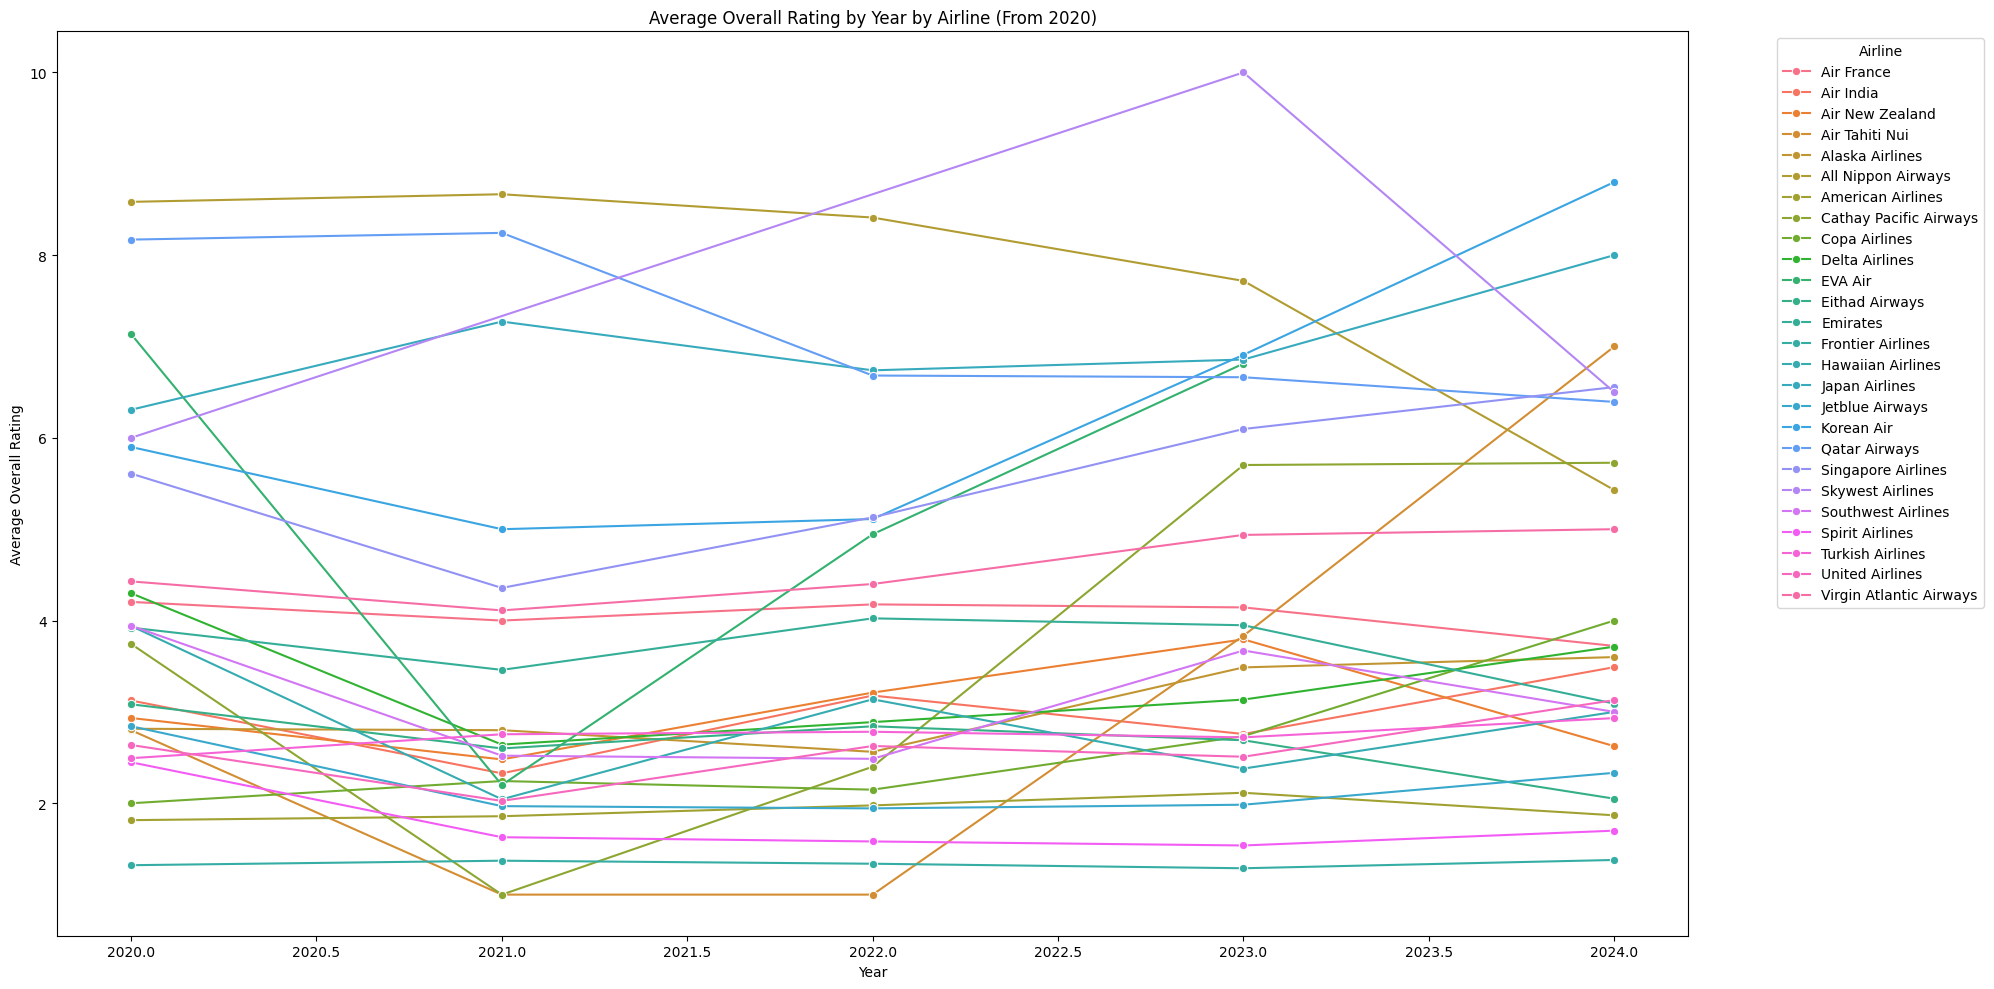

In [29]:
df_filtered = df[df['Review Date'].dt.year >= 2020]

# Extract the year from 'Review Date'
df_filtered['Year'] = df_filtered['Review Date'].dt.year

# Group by 'Airline' and 'Year', then calculate the mean 'Overall Rating'
rating_trends_by_year = df_filtered.groupby(['Airline', 'Year'])['Overall Rating'].mean().reset_index()

# Create a larger plot
plt.figure(figsize=(20, 10))  # Increase the size to give more room

# Create the lineplot with seaborn
sns.lineplot(data=rating_trends_by_year, x='Year', y='Overall Rating', hue='Airline', marker='o')

# Set title and labels
plt.title('Average Overall Rating by Year by Airline (From 2020)')
plt.xlabel('Year')
plt.ylabel('Average Overall Rating')

# Place the legend outside the plot area
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()  # Adjust layout to fit legend and prevent clipping
plt.show()

In [31]:
df.head(5)

,Review Title,Review Date,Airline,Verified,Review Content,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
0,Food was below par,2024-04-21,Singapore Airlines,True,Overall disappointing from Singapore Airlines....,Couple Leisure,2024-04-01,Melbourne to Singapore,Economy Class,4,5,4,4,3,5
1,recent pricing and service changes,2024-04-21,Singapore Airlines,True,I usually fly Singapore Airlines international...,Business,2024-04-01,Zurich to Singapore,Premium Economy,2,4,1,1,1,6
2,Crew was super nice,2024-04-14,Singapore Airlines,True,"Flight was great! Crew was super nice, Chief S...",Solo Leisure,2024-01-01,London to Singapore,Business Class,5,5,3,2,5,10
3,attendants are helpful and polite,2024-04-13,Singapore Airlines,True,The cabin is clean. Flight attendants are help...,Solo Leisure,2024-04-01,Taipei to Singapore,Economy Class,5,4,5,5,4,9
4,food were served last,2024-04-12,Singapore Airlines,False,From Kochi to Singapore and vice verse we trav...,Couple Leisure,2024-04-01,Kochi to Singapore,Economy Class,3,2,5,3,2,3


In [33]:
# Assuming 'df' is your DataFrame and 'Recommended' is the column you want to convert
df['Verified'] = df['Verified'].replace({True: 1, False: 0})

In [34]:
df.head(10)

,Review Title,Review Date,Airline,Verified,Review Content,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
0,Food was below par,2024-04-21,Singapore Airlines,True,Overall disappointing from Singapore Airlines....,Couple Leisure,2024-04-01,Melbourne to Singapore,Economy Class,4,5,4,4,3,5
1,recent pricing and service changes,2024-04-21,Singapore Airlines,True,I usually fly Singapore Airlines international...,Business,2024-04-01,Zurich to Singapore,Premium Economy,2,4,1,1,1,6
2,Crew was super nice,2024-04-14,Singapore Airlines,True,"Flight was great! Crew was super nice, Chief S...",Solo Leisure,2024-01-01,London to Singapore,Business Class,5,5,3,2,5,10
3,attendants are helpful and polite,2024-04-13,Singapore Airlines,True,The cabin is clean. Flight attendants are help...,Solo Leisure,2024-04-01,Taipei to Singapore,Economy Class,5,4,5,5,4,9
4,food were served last,2024-04-12,Singapore Airlines,False,From Kochi to Singapore and vice verse we trav...,Couple Leisure,2024-04-01,Kochi to Singapore,Economy Class,3,2,5,3,2,3
5,seat spacing is less,2024-04-07,Singapore Airlines,True,"The flight went from Terminal 1, the terminal ...",Business,2024-02-01,Singapore to Sydney,Economy Class,1,5,1,5,1,5
6,service was efficient and friendly,2024-03-31,Singapore Airlines,True,SQ894 is the afternoon flight to HKG operated ...,Solo Leisure,2024-01-01,Singapore to Hong Kong,Business Class,1,5,4,5,5,10
7,“Very disappointed”,2024-03-31,Singapore Airlines,True,Very disappointed with Singapore Airlines. Dat...,Solo Leisure,2024-03-01,Munich to Singapore,Business Class,5,3,5,3,1,1
8,incompetent customer service,2024-03-30,Singapore Airlines,True,I was flying business class from BCN to MLE vi...,Couple Leisure,2024-03-01,Singapore to Male,Business Class,1,5,2,4,1,1
9,not be flying Singapore Airlines again,2024-03-28,Singapore Airlines,True,Singapore Airlines continues to enjoy a good r...,Solo Leisure,2024-03-01,Singapore to Phuket,Economy Class,4,4,3,1,1,2


In [36]:
df.head(1)

,Review Title,Review Date,Airline,Verified,Review Content,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
0,Food was below par,2024-04-21,Singapore Airlines,True,Overall disappointing from Singapore Airlines....,Couple Leisure,2024-04-01,Melbourne to Singapore,Economy Class,4,5,4,4,3,5


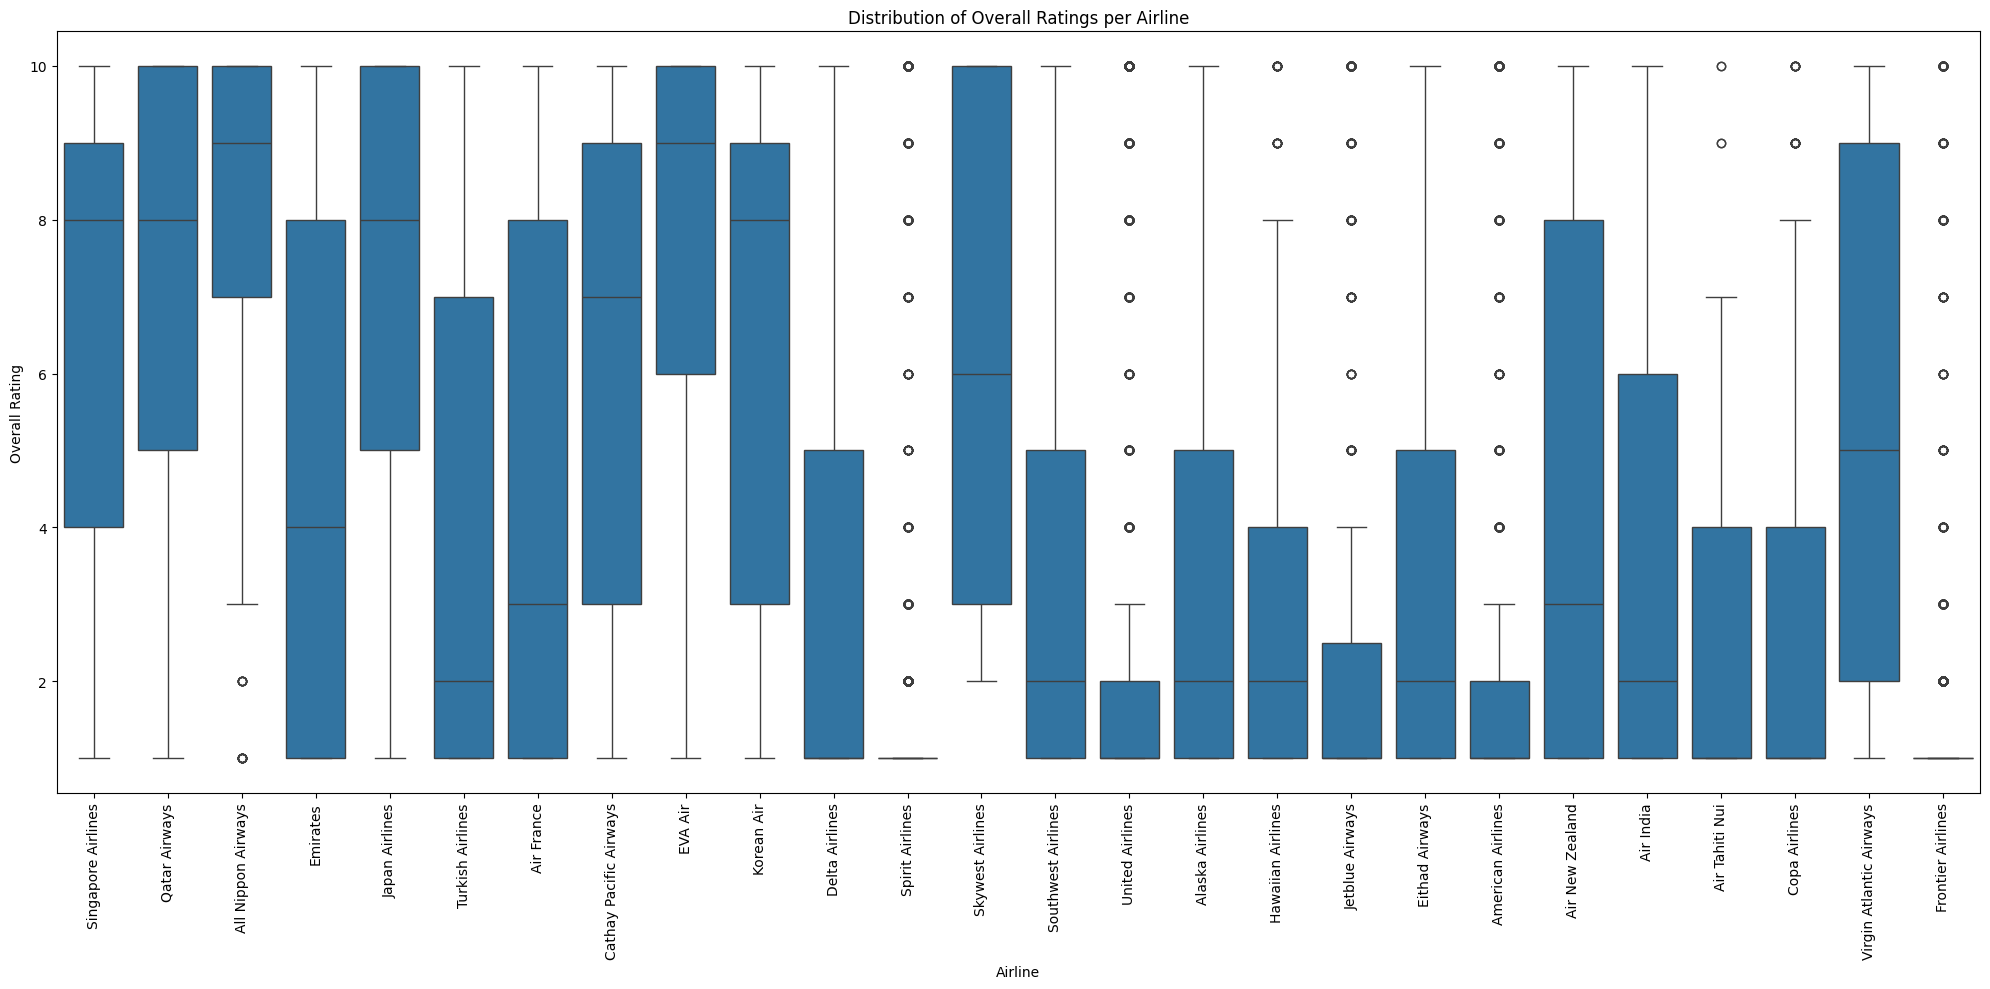

In [37]:
# Create a boxplot
plt.figure(figsize=(20, 10))  # Set the figure size
sns.boxplot(data=df, x='Airline', y='Overall Rating')

# Set title and labels
plt.title('Distribution of Overall Ratings per Airline')
plt.xlabel('Airline')
plt.ylabel('Overall Rating')

# Improve the readability of the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels to fit all airline names

# Display the plot
plt.tight_layout()  # Adjust layout to fit and prevent clipping
plt.show()

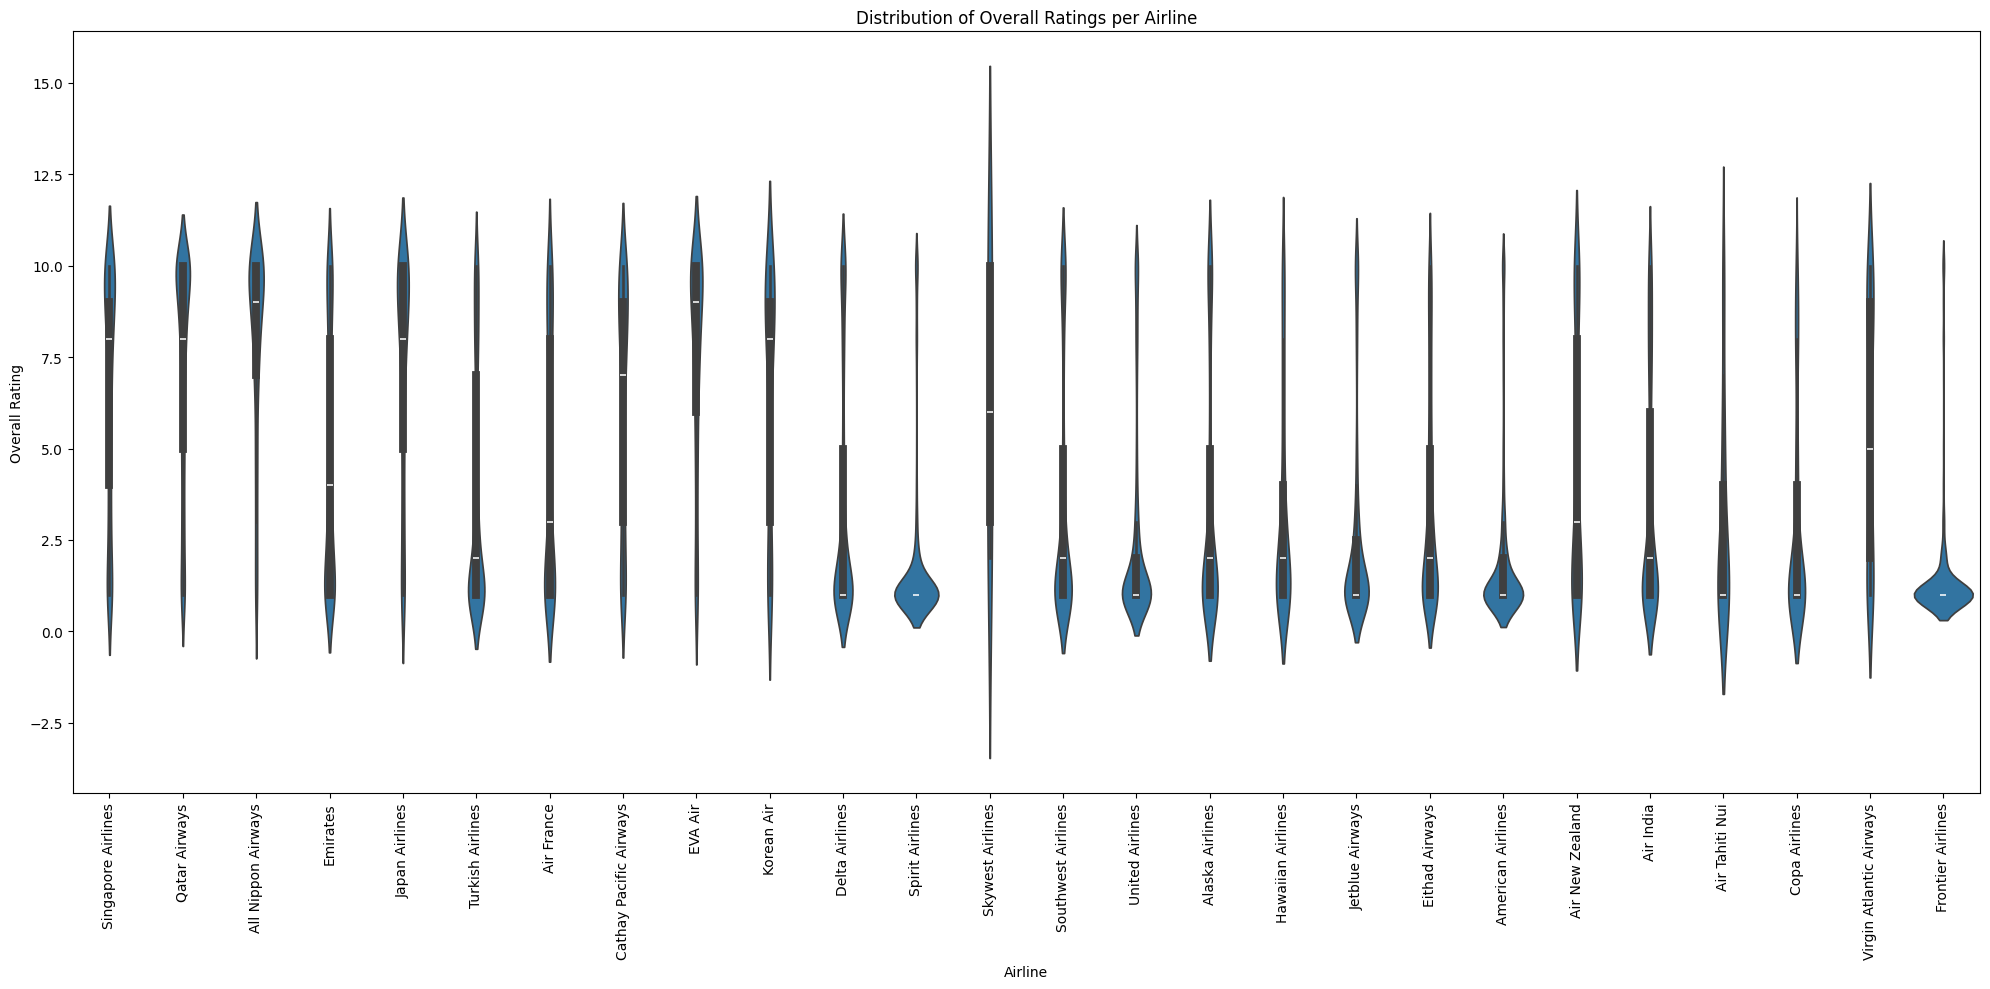

In [38]:
plt.figure(figsize=(20, 10))  # Set the figure size
sns.violinplot(data=df, x='Airline', y='Overall Rating')

# Set title and labels
plt.title('Distribution of Overall Ratings per Airline')
plt.xlabel('Airline')
plt.ylabel('Overall Rating')

# Improve the readability of the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels to fit all airline names

# Display the plot
plt.tight_layout()  # Adjust layout to fit and prevent clipping
plt.show()

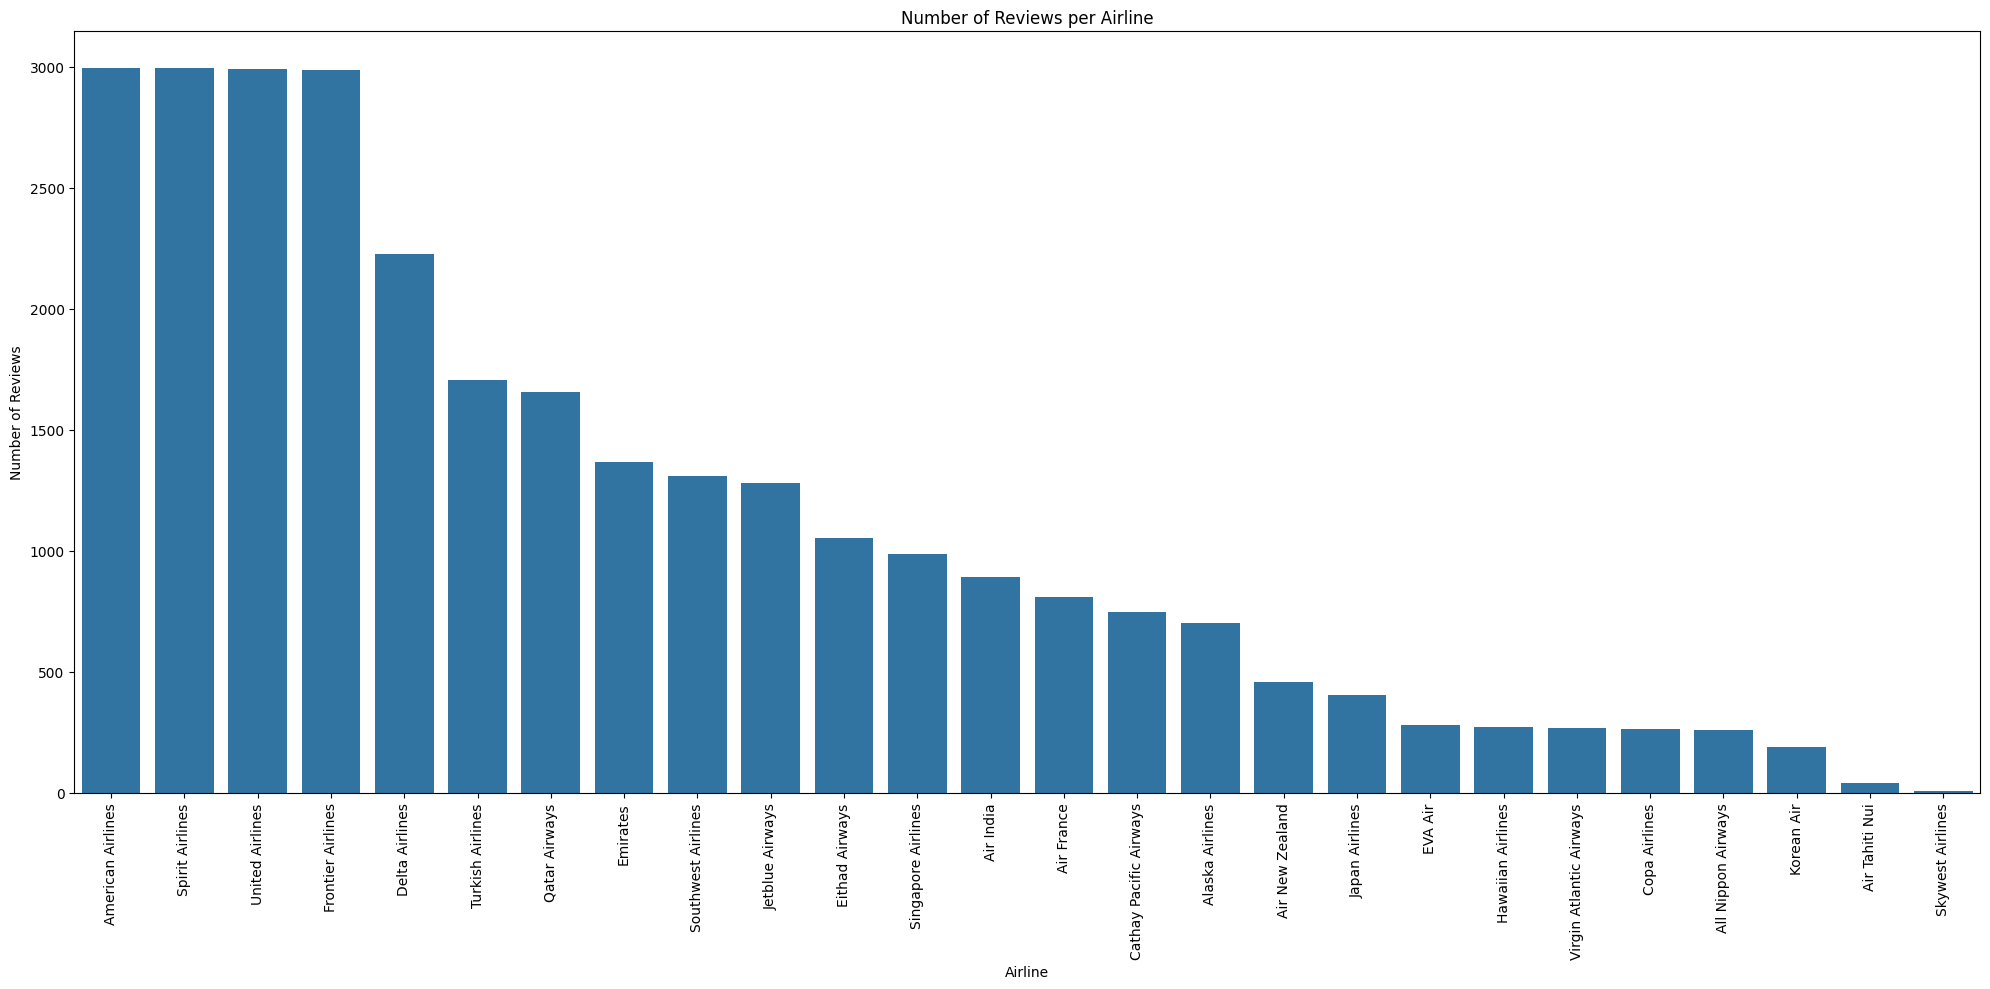

In [39]:
# Create a countplot
plt.figure(figsize=(20, 10))  # Set the figure size
sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index)

# Set title and labels
plt.title('Number of Reviews per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Reviews')

# Improve the readability of the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels to fit all airline names

# Display the plot
plt.tight_layout()  # Adjust layout to fit and prevent clipping
plt.show()

In [40]:
unique_airlines = df['Airline'].unique()
print(unique_airlines)

['Singapore Airlines' 'Qatar Airways' 'All Nippon Airways' 'Emirates'
 'Japan Airlines' 'Turkish Airlines' 'Air France' 'Cathay Pacific Airways'
 'EVA Air' 'Korean Air' 'Delta Airlines' 'Spirit Airlines'
 'Skywest Airlines' 'Southwest Airlines' 'United Airlines'
 'Alaska Airlines' 'Hawaiian Airlines' 'Jetblue Airways' 'Eithad Airways'
 'American Airlines' 'Air New Zealand' 'Air India' 'Air Tahiti Nui'
 'Copa Airlines' 'Virgin Atlantic Airways' 'Frontier Airlines']
